In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from lib import get_data
from knn import Point, Status, get_points as get_data_knn

In [2]:
data = np.loadtxt("../A1_datasets/microchips.csv", delimiter=',', dtype=float)
kdata = get_data_knn("../A1_datasets/microchips.csv")

In [3]:
def kdata_str(data: np.ndarray) -> list[tuple[float, float, int]]:
    print(data)
    return list(map(lambda p: (p.x, p.y, 1 if p.status == Status.Ok else 0), data))

In [4]:
def plot_data(data: npt.ArrayLike, colors=["blue", "red"]) -> None:
    np_data = np.array(data, dtype=np.float32)
    ok_points = np_data[np_data[:, 2] == 1]
    fail_points = np_data[np_data[:, 2] == 0]
    plt.scatter(
        ok_points[:, 0],
        ok_points[:, 1],
        c=colors[0],
        marker=MarkerStyle(marker="o"),
    )
    plt.scatter(
        fail_points[:, 0],
        fail_points[:, 1],
        c=colors[1],
        marker=MarkerStyle(marker="x"),
    )

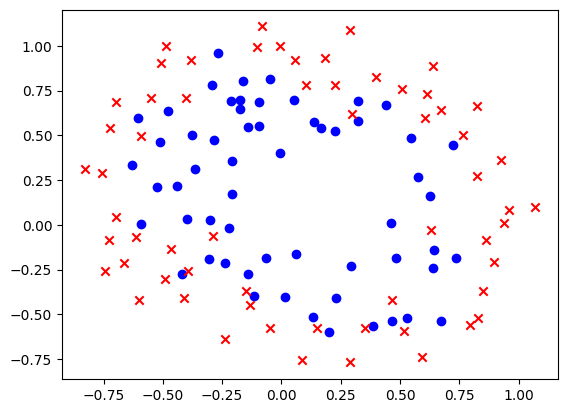

In [5]:
plot_data(data)

[Point(x=-0.40956, y=-0.41155, status=<Status.Fail: 0>)
 Point(x=-0.59965, y=-0.41886, status=<Status.Fail: 0>)
 Point(x=-0.49021, y=-0.3019, status=<Status.Fail: 0>)
 Point(x=-0.42108, y=-0.27266, status=<Status.Ok: 1>)
 Point(x=-0.39228, y=-0.25804, status=<Status.Fail: 0>)
 Point(x=-0.23675, y=-0.63816, status=<Status.Fail: 0>)
 Point(x=-0.66302, y=-0.21418, status=<Status.Fail: 0>)]
[Point(x=-0.40956, y=-0.41155, status=<Status.Fail: 0>)
 Point(x=-0.59965, y=-0.41886, status=<Status.Fail: 0>)
 Point(x=-0.49021, y=-0.3019, status=<Status.Fail: 0>)
 Point(x=-0.42108, y=-0.27266, status=<Status.Ok: 1>)
 Point(x=-0.39228, y=-0.25804, status=<Status.Fail: 0>)
 Point(x=-0.23675, y=-0.63816, status=<Status.Fail: 0>)
 Point(x=-0.66302, y=-0.21418, status=<Status.Fail: 0>)]


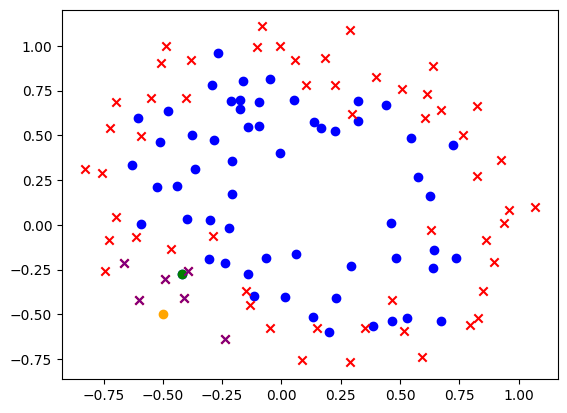

In [6]:
p1: Point = Point(-0.5, -0.5)
nearest = p1.nearest_points(kdata, 7)
print(nearest)
plot_data([("-0.5", "-0.5", "1")], colors=["orange", "orange"])
plot_data(data)
plot_data(kdata_str(nearest), colors=["green", "purple"])

Point=(-0.3, 1.0, 0)
Point=(-0.5, -0.1, 0)
Point=(0.6, 0.0, 0)
[Point(x=-0.3, y=1.0, status=<Status.Ok: 1>), Point(x=-0.5, y=-0.1, status=<Status.Fail: 0>), Point(x=0.6, y=0.0, status=<Status.Fail: 0>)]


[Point(x=-0.3, y=1.0, status=<Status.Ok: 1>),
 Point(x=-0.5, y=-0.1, status=<Status.Fail: 0>),
 Point(x=0.6, y=0.0, status=<Status.Fail: 0>)]

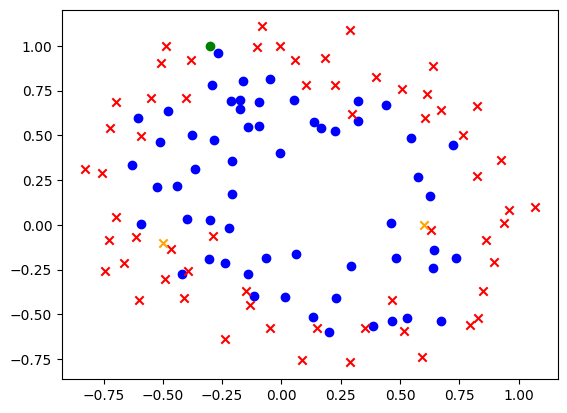

In [10]:
from knn import is_ok
k1 = []
k3 = []
k5 = []
k7 = []

points = [Point(-0.3, 1.0), Point(-0.5, -0.1), Point(0.6, 0.0)]
for point in points:
    print(point)
    k1.append(point.with_status(is_ok(point, kdata, 1)))
    k3.append(point.with_status(is_ok(point, kdata, 3)))
    k5.append(point.with_status(is_ok(point, kdata, 5)))
    k7.append(point.with_status(is_ok(point, kdata, 7)))

plot_data(data)
plot_data(kdata_str(k1), colors=["green", "orange"])
k1